In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [41]:
df_years = [0]*5
df_years[0] = pd.read_csv(r'gt_2011.csv', encoding='utf-8', delimiter=',')
df_years[1] = pd.read_csv(r'gt_2012.csv', encoding='utf-8', delimiter=',')
df_years[2] = pd.read_csv(r'gt_2013.csv', encoding='utf-8', delimiter=',')
df_years[3] = pd.read_csv(r'gt_2014.csv', encoding='utf-8', delimiter=',')
df_years[4] = pd.read_csv(r'gt_2015.csv', encoding='utf-8', delimiter=',')
df = pd.concat(df_years,  keys = [11,12,13,14,15])

In [42]:
df_headers = [v for v in df.columns.values]
X = df[df_headers[:-2]]
# X.head()
y = df[df_headers[-2:]]
# y.head()

In [43]:
X = X.loc[[14, 15]]
y = y.loc[[14, 15]]
# y_co_mask = y.CO > 4.5
y_co = y[['CO']].copy()

y_co_regr = y_co.to_numpy().ravel()
# print(y_co_regr)

print(y_co)

              CO
14 0      1.9157
   1      2.0596
   2      2.1621
   3      2.1214
   4      2.1549
...          ...
15 7379  10.9930
   7380  11.1440
   7381  11.4140
   7382   3.3134
   7383  11.9810

[14542 rows x 1 columns]


In [44]:
# X_train, X_test, y_train, y_test = train_test_split (X, y_co_np, test_size=0.3, random_state=10)

In [45]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

In [46]:
# from matplotlib import cm as pltcm
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import sklearn.metrics as metrics
def plot_roc_auc(y_test, predictions, type = 'r'):
    print("Accuracy =", metrics.accuracy_score(predictions, y_test))
    print("Precision = ",metrics.precision_score(y_test, predictions, average = None))
    print("recall = ",metrics.recall_score(y_test, predictions, average = None))
    print("f1 = ",metrics.f1_score(y_test, predictions, average = None))
    if (type == 'c'):
        fpr, tpr, treshold = roc_curve(y_test, predictions)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, color='darkorange',
                 label='ROC кривая (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC-AUC')
        plt.legend(loc="lower right")
        plt.grid()
        plt.show()

In [47]:
#regression
# print(y_co_regr)
X_train, X_test, y_train, y_test = train_test_split (X, y_co_regr, test_size=0.3, random_state=10)

RFR = RandomForestRegressor(n_estimators = 500, criterion = 'squared_error', max_depth = 9, random_state=10)
RFR.fit(X_train, y_train)
RFR_prediction = RFR.predict(X_test)

AdBR = AdaBoostRegressor(estimator = DecisionTreeRegressor(max_depth = 9), loss = 'square', n_estimators = 50, random_state=10)
AdBR.fit(X_train, y_train)
AdBR_prediction = AdBR.predict(X_test) 

GBR = GradientBoostingRegressor(n_estimators = 50, max_depth = 9, subsample = 0.4, random_state=10)
GBR.fit(X_train, y_train)
GBR_prediction = GBR.predict(X_test)
# print()

RFR loss = 0.9453256115901448
AdBR loss = 1.329301450379636
GBR loss = 0.9944515938900642
3946


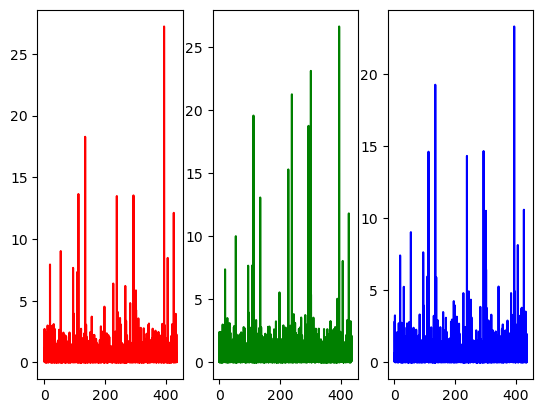

In [48]:
# print(GBR_prediction)
# print(y_test)
RFR_loss = sum((y_test - RFR_prediction)**2)/len(y_test)
AdBR_loss = sum((y_test - AdBR_prediction)**2)/len(y_test)
GBR_loss = sum((y_test - GBR_prediction)**2)/len(y_test)
print(f'RFR loss = {RFR_loss}')
print(f'AdBR loss = {AdBR_loss}')
print(f'GBR loss = {GBR_loss}')
plt.subplot(131)
x_plot = np.arange(0, len(y_test)/10, 0.1)
plt.plot(x_plot, np.abs(y_test - RFR_prediction), color = 'r')
plt.subplot(132)
x_plot = np.arange(0, len(y_test)/10, 0.1)
plt.plot(x_plot, np.abs(y_test - AdBR_prediction), color = 'g')
plt.subplot(133)
x_plot = np.arange(0, len(y_test)/10, 0.1)
plt.plot(x_plot, np.abs(y_test - GBR_prediction), color = 'b')
print(np.argmax(y_test - GBR_prediction))
# print(y_test

In [49]:
# print(y_co)
y_co[y_co["CO"] <= 4.5] = -1
y_co[y_co["CO"] > 4.5] = 1
# print(y_co)
# y_co
y_co_class = y_co.to_numpy().ravel()

In [50]:
#classification
X_train, X_test, y_train, y_test = train_test_split (X, y_co_class, test_size=0.3, random_state=10)

RFC = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', max_depth = 7, max_features = 'sqrt', random_state=10)
RFC.fit(X_train, y_train)
RFC_prediction = RFC.predict(X_test)

AdBC = AdaBoostClassifier(estimator = DecisionTreeClassifier(max_depth = 7, max_features = 'sqrt'), n_estimators = 20, random_state=10)
AdBC.fit(X_train, y_train)
AdBC_prediction = AdBC.predict(X_test)


GBC = GradientBoostingClassifier(n_estimators = 20, max_depth = 7, subsample = 0.4, max_features = 'sqrt', random_state=10)
GBC.fit(X_train, y_train)
GBC_prediction = GBC.predict(X_test)

Accuracy = 0.9660783864313546
Precision =  [0.98062707 0.83636364]
recall =  [0.98162797 0.82882883]
f1 =  [0.98112726 0.83257919]


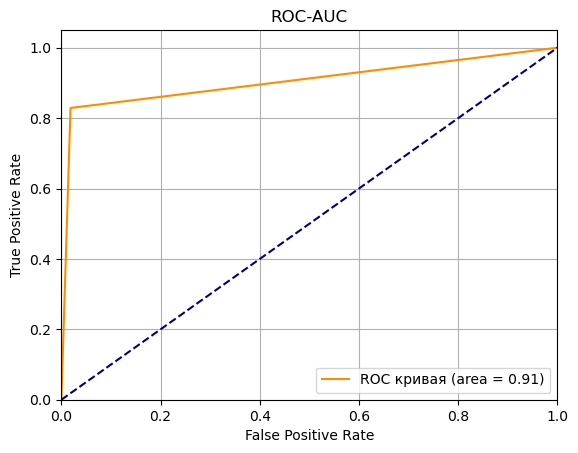

Accuracy = 0.9596607838643135
Precision =  [0.97536195 0.81455399]
recall =  [0.9798418  0.78153153]
f1 =  [0.97759674 0.79770115]


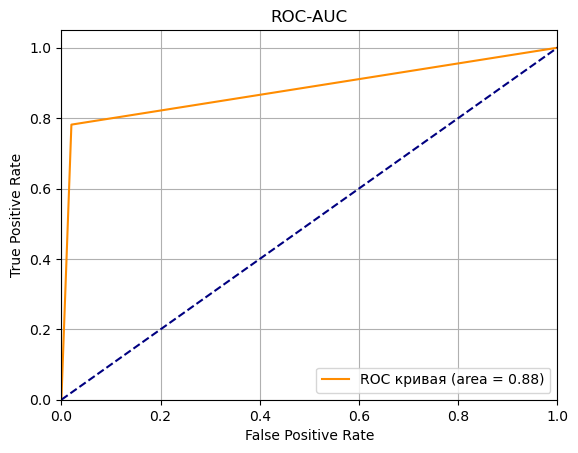

Accuracy = 0.9642447856979143
Precision =  [0.9730953  0.87305699]
recall =  [0.98749681 0.75900901]
f1 =  [0.98024316 0.81204819]


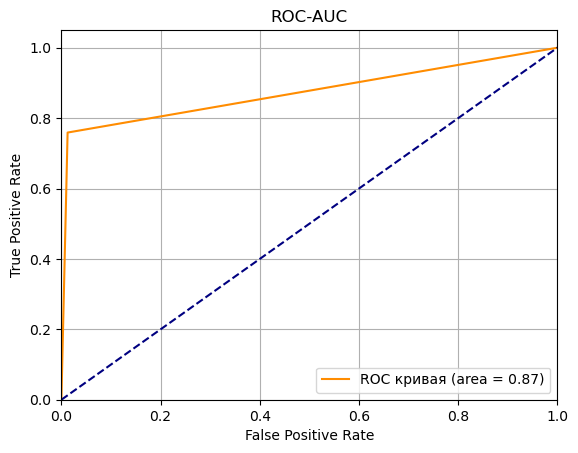

In [51]:
plot_roc_auc(y_test, RFC_prediction, type = 'c')
plot_roc_auc(y_test, AdBC_prediction, type = 'c')
plot_roc_auc(y_test, GBC_prediction, type = 'c')